This is the bike sharing dataset from Kaggle: https://www.kaggle.com/lakshmi25npathi/bike-sharing-dataset/activity


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import dataset
df = pd.read_csv('hour.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
# Dropping the instant column as its just another index
df.drop('instant',axis=1,inplace=True)
# Converting the dteday to a datetime variable
df['dteday'] = pd.to_datetime(df['dteday'])

In [6]:
df['yr'] = df['dteday'].apply(lambda x : x.year)

I first want to check that there are an approximately equal number of data points for each season, year, month and weekday

<AxesSubplot:xlabel='season', ylabel='count'>

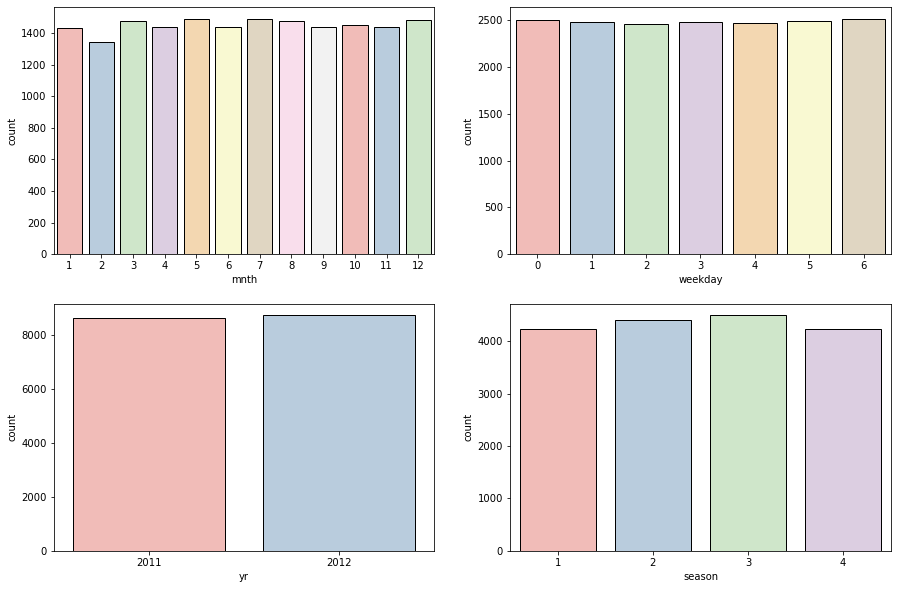

In [480]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
axes = axes.ravel()
sns.countplot(x='mnth',
              data=df,ax=axes[0],
              palette='Pastel1',
             edgecolor='k')
sns.countplot(x='weekday',
              data=df,
              ax=axes[1],
             palette = 'Pastel1',
             edgecolor='k')
sns.countplot(x='yr',
              data=df,
              ax=axes[2],
             palette = 'Pastel1',
             edgecolor='k')
sns.countplot(x='season',
              data=df,
              ax=axes[3],
             palette = 'Pastel1',
             edgecolor='k')

Text(0, 0.5, 'Number of instances')

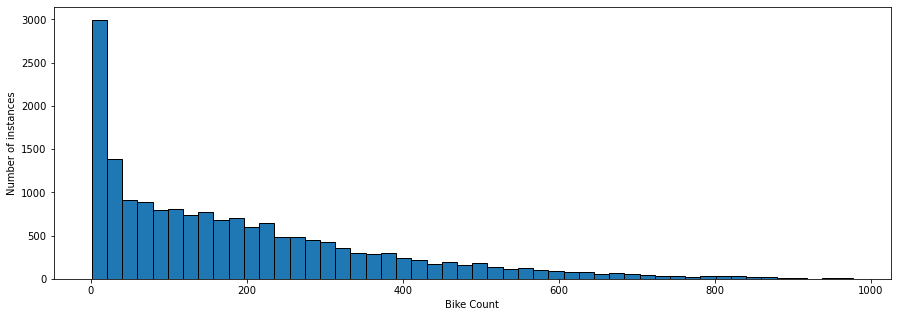

In [485]:
plt.figure(figsize=(15,5))
a,b,c = plt.hist(df.cnt,bins=50,edgecolor='k')
plt.xlabel('Bike Count')
plt.ylabel('Number of instances')

This dataset was selected is particulary clean. Although this isn't representative of a real world dataset, I wanted to focus on ML with this data set rather than data cleaning

In [647]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [648]:
x = df.iloc[:,1:-3].values
y = df.iloc[:,-1].values
X_train, x_test, Y_train, y_test = train_test_split(x, y,random_state=42,test_size=0.33)

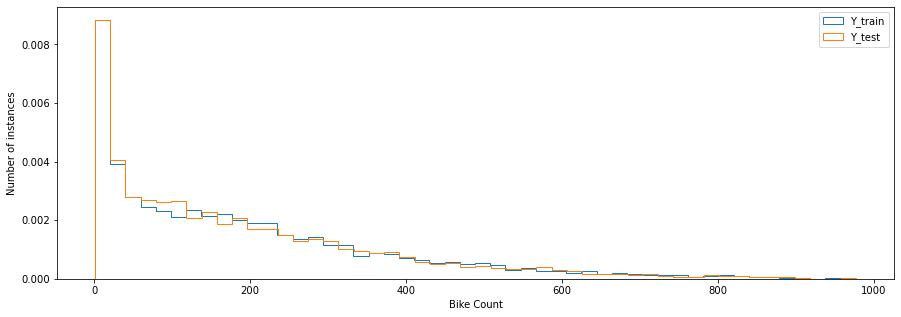

In [649]:
plt.figure(figsize=(15,5))
_ = plt.hist(Y_train,bins=50,label='Y_train',histtype='step',density=True)
_ = plt.hist(y_test,bins=50,label='Y_test',histtype='step',density=True)
plt.xlabel('Bike Count')
plt.ylabel('Number of instances')
plt.legend()

In [650]:
scaler = StandardScaler()

In [651]:
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

In [652]:
lr = LinearRegression()
lrm = lr.fit(X_train,Y_train)

0.39139163128590015


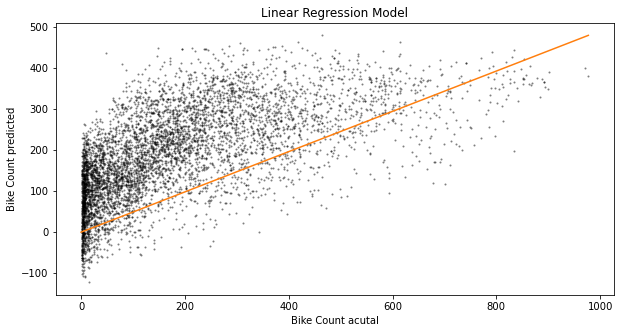

In [653]:
plt.figure(figsize=(10,5))
_ = plt.title('Linear Regression Model')
plt.plot(y_test,lrm.predict(x_test),
         linestyle='none',
         marker='o',
         mfc='none',
         mec='k',
        alpha=0.5,
        ms=1)
plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(lrm.predict(x_test))))
plt.xlabel('Bike Count acutal')
plt.ylabel('Bike Count predicted')
print(lrm.score(x_test,y_test))

# Lets try a decision tree

In [623]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [638]:
param_dist = {'max_depth': np.arange(1,30),
              'min_samples_leaf':np.arange(1,60,3),
             'max_features':['auto', 'sqrt','log2']}
clf = GridSearchCV(DecisionTreeRegressor(), param_dist,cv=10)

In [639]:
clf.fit(X_train,Y_train)
clf.best_params_

{'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 7}

In [642]:
best_tree = DecisionTreeRegressor(max_features= 'auto', max_depth= 20,min_samples_leaf=6)
best_tree.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=20, max_features='auto', min_samples_leaf=6)

0.9138875198427929


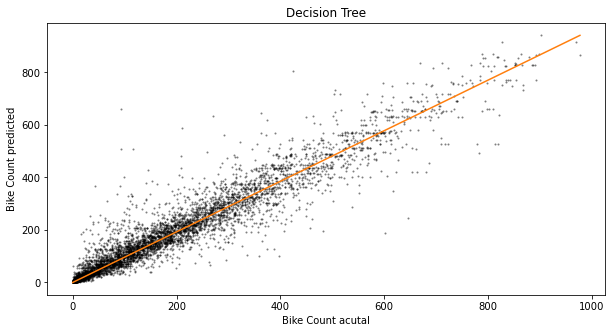

In [643]:
plt.figure(figsize=(10,5))
_ = plt.title('Decision Tree')
plt.plot(y_test,best_tree.predict(x_test),
         linestyle='none',
         marker='o',
         mfc='none',
         mec='k',
        alpha=0.5,
        ms=1)
plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(best_tree.predict(x_test))))
plt.xlabel('Bike Count acutal')
plt.ylabel('Bike Count predicted')
print(best_tree.score(x_test, y_test))